# Hello, this is project 2

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from zipfile import ZipFile # for unzipping the db.zip file
pd.set_option('display.max_columns', None) # show all columns when printing out dataframe
plt.style.use("fivethirtyeight")
import scipy.stats as stats

from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# BOM GROSS has title, year, dom_gross, foreign_gross, SO good earnings metrics

In [383]:
bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_gross_df.head()
#bom_gross_df.info()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [384]:
bom_gross_df.shape

(3387, 5)

foreign_gross is listed as an object

### Need to convert foreign gross, and handle null entries... thinking of just dropping missing gross values

In [4]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
bom_gross_df['foreign_gross'].str.isnumeric().sum()

2032

## Filling NaN's in domestic gross and foreign_gross /w zeros for now

In [385]:
bom_gross_df['domestic_gross'].fillna(0, inplace=True)

In [386]:
bom_gross_df['foreign_gross'].fillna(0, inplace=True)

In [387]:
bom_gross_df.sort_values(by='domestic_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
936,"Lula, Son of Brazil",NYer,0.0,3800000,2012
1079,The Green Wave,RF,0.0,70100,2012
1975,Surprise - Journey To The West,AR,0.0,49600000,2015
966,The Cup (2012),Myr.,0.0,1800000,2012


In [388]:
# There were 1350 null values, now none
bom_gross_df.loc[bom_gross_df['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year


In [389]:
numeric_values = pd.to_numeric(bom_gross_df['foreign_gross'], errors='coerce')
numeric_values.head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [390]:
filtered_df = bom_gross_df[numeric_values.notnull()]

In [391]:
filtered_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [392]:
filtered_df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3382, dtype: object

In [393]:
filtered_df['foreign_gross'].isna().sum()

0

# THIS IS THE WAY TO AVOID SETTING TO COPY, LOL NOT!

In [394]:
filtered_df['foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'], errors='coerce')

<ipython-input-394-8df85d225cb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'], errors='coerce')


In [395]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3377 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   int64  
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 158.5+ KB


In [396]:
filtered_df.sort_values(by='foreign_gross', ascending=False)[:5]

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013


In [397]:
filtered_df[filtered_df['title'].str.contains("Avengers")]

,title,studio,domestic_gross,foreign_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


# 2010 is earliest year on record

In [398]:
filtered_df['year'].min()

2010

In [399]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3377 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   int64  
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 158.5+ KB


In [400]:
filtered_df.loc[filtered_df['foreign_gross'] > 0].sort_values(by='foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013
...,...,...,...,...,...
327,Aashayein (Wishes),Relbig.,0.0,3800,2010
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500,2010
316,The Red Baron,Mont.,37200.0,3100,2010
721,To Die Like a Man,Strand,4000.0,900,2011


# Making a new df object for movies grossing more than $1M domestically

In [401]:
bom_df = filtered_df.loc[(filtered_df['domestic_gross'] > 1000000)].copy()

In [402]:
bom_df.sort_values(by="domestic_gross", ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year
3080,Black Panther,BV,700100000.0,646900000,2018
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
729,The Dark Knight Rises,WB,448100000.0,636800000,2012
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013


In [403]:
bom_df.year.agg(['max', 'min', 'mean'])  # 2010-2018

max     2018.000000
min     2010.000000
mean    2014.007374
Name: year, dtype: float64

In [404]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763 entries, 0 to 3281
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1763 non-null   object 
 1   studio          1763 non-null   object 
 2   domestic_gross  1763 non-null   float64
 3   foreign_gross   1763 non-null   int64  
 4   year            1763 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 82.6+ KB


In [323]:
# in_mills = (bom_df.loc[:, 'domestic_gross'] / 1000000)

In [324]:
# bom_df.loc[:, 'domestic_gross'] = in_mills.copy()

In [405]:
bom_df['domestic_gross'] = (bom_df['domestic_gross'] / 1000000)

In [406]:
bom_df['domestic_gross'].sort_values(ascending=False)

3080    700.1
727     623.4
2758    620.2
3082    608.6
2323    532.2
        ...  
991       1.1
588       1.1
589       1.1
1734      1.1
1360      1.1
Name: domestic_gross, Length: 1763, dtype: float64

In [407]:
bom_df['foreign_gross'] = (bom_df['foreign_gross'] / 1000000)  

In [408]:
bom_df['foreign_gross'].sort_values(ascending=False)

328     960.5
1875    946.4
727     895.5
3081    891.8
1127    875.7
        ...  
1717      0.0
2524      0.0
2523      0.0
2522      0.0
3281      0.0
Name: foreign_gross, Length: 1763, dtype: float64

# Failed attempts at assignment because .loc was unneccessary

In [342]:
# bom_df.loc[:, 'domestic_gross'] = bom_df['domestic_gross'] /1000000

In [343]:
# bom_df.loc[:, 'domestic_gross'] = (bom_df.loc[:, 'domestic_gross'] / 1000000).copy()

In [344]:
# bom_df.loc[:, 'domestic_gross'] = bom_df.loc[:, 'domestic_gross'] / 1000000

In [409]:
bom_df.sort_values(by='foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,2011
1875,Avengers: Age of Ultron,BV,459.0,946.4,2015
727,Marvel's The Avengers,BV,623.4,895.5,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417.7,891.8,2018
1127,Frozen,BV,400.7,875.7,2013
...,...,...,...,...,...
2563,Mohenjo Daro,UTV,1.3,0.0,2016
2562,Housefull 3,Eros,1.3,0.0,2016
2561,Embrace of the Serpent,Osci.,1.3,0.0,2016
2560,The Neon Demon,BG,1.3,0.0,2016


In [410]:
bom_df['total_gross'] = (bom_df['domestic_gross'] + bom_df['foreign_gross'])

In [411]:
bom_df.sort_values(by=["studio", "total_gross"], ascending=True)

,title,studio,domestic_gross,foreign_gross,year,total_gross
155,Sea Rex 3D: Journey to a Prehistoric World,3D,6.1,9.900,2010,16.000
1736,The Captive,A24,1.1,0.000,2014,1.100
1737,Laggies,A24,1.1,0.000,2014,1.100
3281,Lean on Pete,A24,1.2,0.000,2018,1.200
1723,Locke,A24,1.4,0.000,2014,1.400
...,...,...,...,...,...,...
2406,Sultan,Yash,6.2,81.100,2016,87.300
2835,Tiger Zinda Hai,Yash,5.6,81.800,2017,87.400
1204,Dhoom 3,Yash,8.0,80.000,2013,88.000
2556,Rustom,Zee,1.1,0.571,2016,1.671


# Incorrect way of trying to manipulate a groubpy object

In [412]:
# bom_df.groupby("studio").sort_values(by="total_gross", ascending=False)

# Most Profitable Studios

### correct way to do it

In [413]:
bom_df.groupby("studio").agg(total_gross=("total_gross", "sum")).sort_values(by="total_gross", ascending=False)[:10]

,total_gross
studio,
BV,42528.647998
Fox,31005.366596
WB,30833.702998
Uni.,28521.667999
Sony,21927.935997
Par.,19521.384997
WB (NL),10334.699999
LGF,8191.415300
LG/S,5431.923998


### New Line Cinema

In [414]:
bom_df[bom_df['studio'] == 'WB (NL)'].sort_values(by='total_gross', ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year,total_gross
730,The Hobbit: An Unexpected Journey,WB (NL),303.000000,718.1,2012,1021.100000
1130,The Hobbit: The Desolation of Smaug,WB (NL),258.399999,700.0,2013,958.399999
1478,The Hobbit: The Battle of the Five Armies,WB (NL),255.100000,700.9,2014,956.000000
2770,It,WB (NL),327.500000,372.9,2017,700.400000
1887,San Andreas,WB (NL),155.200000,318.8,2015,474.000000
3099,Rampage (2018),WB (NL),101.000000,327.0,2018,428.000000
3104,The Nun,WB (NL),117.500000,248.1,2018,365.600000
750,Journey 2: The Mysterious Island,WB (NL),103.900000,231.4,2012,335.300000
2349,The Conjuring 2,WB (NL),102.500000,217.9,2016,320.400000
1149,The Conjuring,WB (NL),137.400000,182.1,2013,319.500000


In [415]:
bom_df.title.duplicated().sum()

0

In [416]:
# 114 unique studios
len(bom_df.studio.unique())

114

In [418]:
# bom_df.studio.unique()

In [419]:
bom_df.sort_values(by="total_gross", ascending=False)[:20]

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623.4,895.5,2012,1518.9
1875,Avengers: Age of Ultron,BV,459.0,946.4,2015,1405.4
3080,Black Panther,BV,700.1,646.9,2018,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,2011,1341.5
2758,Star Wars: The Last Jedi,BV,620.2,712.4,2017,1332.6
3081,Jurassic World: Fallen Kingdom,Uni.,417.7,891.8,2018,1309.5
1127,Frozen,BV,400.7,875.7,2013,1276.4
2759,Beauty and the Beast (2017),BV,504.0,759.5,2017,1263.5
3082,Incredibles 2,BV,608.6,634.2,2018,1242.8
1128,Iron Man 3,BV,409.0,805.8,2013,1214.8


# 2nd CSV: "the numbers" movie budgets and gross values

In [230]:
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [231]:
tn_budgets_df.shape

(5782, 6)

In [232]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Looks like near agreement on the total gross values between the two databases

In [233]:
tn_budgets_df[tn_budgets_df['movie'] == "Avengers: Age of Ultron"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


In [234]:
# FIRST DATABASE INFORMATION
bom_df[bom_df['title'] == "Avengers: Age of Ultron"]

NameError: name 'bom_df' is not defined

In [235]:
tn_budgets_df[tn_budgets_df['movie'] == "Avengers: Infinity War"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [236]:
bom_df[bom_df['title'] == "Avengers: Infinity War"]

NameError: name 'bom_df' is not defined

# Looks like near agreement on the total gross values between the two databases

In [237]:
bom_df[bom_df['title'].str.contains("Avatar")]

NameError: name 'bom_df' is not defined

# But not all items are the same

Need to convert columns to numeric: production_budget, domestic_gross, worldwide_gross

In [238]:
tn_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [239]:
tn_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].head(2)

,production_budget,domestic_gross,worldwide_gross
0,"$425,000,000","$760,507,625","$2,776,345,279"
1,"$410,600,000","$241,063,875","$1,045,663,875"


In [240]:
tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '')
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

In [241]:
tn_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].head(2)

,production_budget,domestic_gross,worldwide_gross
0,425000000,760507625,2776345279
1,410600000,241063875,1045663875


In [242]:
tn_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes

production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [243]:
tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'].astype(int)
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'].astype(int)
tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'].astype(int)

In [244]:
tn_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes

production_budget    int64
domestic_gross       int64
worldwide_gross      int64
dtype: object

# GROSS PROFIT COLUMN CREATION!

In [245]:
tn_budgets_df['gross_profit'] = 0
tn_budgets_df['gross_profit'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']
tn_budgets_df['gross_profit'].agg(['max', 'min', 'mean'])

max     2.351345e+09
min    -2.002376e+08
mean    5.989970e+07
Name: gross_profit, dtype: float64

In [246]:
tn_budgets_df.sort_values(by='gross_profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


# FURTHER TRANSFORMATION!!!

# I think I will also divide these values by 1M

In [247]:
tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'] / 1000000 
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'] / 1000000 
tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'] / 1000000 
tn_budgets_df['gross_profit'] = tn_budgets_df['gross_profit'] / 1000000 


In [248]:
tn_budgets_df['movie_year'] = tn_budgets_df['release_date'].map(lambda x: x[-4:]).astype(int)

In [249]:
tn_budgets_df['roi'] = tn_budgets_df['gross_profit'] / tn_budgets_df['production_budget']

In [250]:
tn_budgets_df['two_x'] = 0
tn_budgets_df['two_x'] = tn_budgets_df['roi'].map(lambda x: 1 if x >= 2 else 0)

In [251]:
tn_budgets_df.shape

(5782, 10)

# Getting rid of zero dom/world gross films

In [252]:
tn_budgets_df = tn_budgets_df.loc[tn_budgets_df['roi'] != -1]
tn_budgets_df.shape

(5415, 10)

In [253]:
tn_budgets_df['quartile'] = 0
tn_budgets_df["quartile"] = pd.qcut(tn_budgets_df["production_budget"], q=4, labels=["Bottom 25", "25-50", "50-75", "Top 25"])

In [254]:
len(tn_budgets_df.loc[tn_budgets_df['roi'] != -1])

5415

In [255]:
tn_budgets_df.shape

(5415, 11)

In [256]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009,5.532577,1,Top 25
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,2011,1.546673,0,Top 25
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-200.237650,2019,-0.572108,0,Top 25
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,1072.413963,2015,3.243841,1,Top 25
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,999.721747,2017,3.153696,1,Top 25


Determined these movies revenue numbers unreliable

In [213]:

# full_loss = tn_budgets_df.loc[tn_budgets_df['roi'] == -1]
# full_loss.loc[full_loss['movie_year'] >= 2013].sort_values(by="movie_year", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,roi,price_tier,quartile,two_x,movie_year
194,95,"Dec 31, 2020",Moonfall,150.00,0.0,0.0,-150.00,-1.0,150,Top 25,0,2020
535,36,"Feb 21, 2020",Call of the Wild,82.00,0.0,0.0,-82.00,-1.0,82,Top 25,0,2020
1205,6,"Dec 31, 2020",Hannibal the Conqueror,50.00,0.0,0.0,-50.00,-1.0,50,Top 25,0,2020
1542,43,"Sep 13, 2019",The Goldfinch,40.00,0.0,0.0,-40.00,-1.0,40,50-75,0,2019
3947,48,"Jun 21, 2019",Burn Your Maps,8.00,0.0,0.0,-8.00,-1.0,8,25-50,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
5483,84,"Dec 31, 2013",Bucky and the Squirrels,0.50,0.0,0.0,-0.50,-1.0,low,Bottom 25,0,2013
4765,66,"Jan 15, 2013",30 Nights Of Paranormal Activity With The Devi...,3.00,0.0,0.0,-3.00,-1.0,low,Bottom 25,0,2013
4843,44,"Jun 21, 2013",Alien Uprising,2.50,0.0,0.0,-2.50,-1.0,low,Bottom 25,0,2013
5663,64,"May 3, 2013",Aroused,0.15,0.0,0.0,-0.15,-1.0,low,Bottom 25,0,2013


In [257]:
tn_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009,5.532577,1,Top 25
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,2011,1.546673,0,Top 25


In [258]:
tn_budgets_df.sort_values(by='gross_profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009,5.532577,1,Top 25
42,43,"Dec 19, 1997",Titanic,200.0,659.363944,2208.208395,2008.208395,1997,10.041042,1,Top 25
6,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200,2018,5.827114,1,Top 25
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220,2015,5.710167,1,Top 25
33,34,"Jun 12, 2015",Jurassic World,215.0,652.270625,1648.854864,1433.854864,2015,6.669092,1,Top 25
...,...,...,...,...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,2002,-0.929050,0,Top 25
352,53,"Apr 27, 2001",Town & Country,105.0,6.712451,10.364769,-94.635231,2001,-0.901288,0,Top 25
341,42,"Jun 14, 2019",Men in Black: International,110.0,3.100000,3.100000,-106.900000,2019,-0.971818,0,Top 25
193,94,"Mar 11, 2011",Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,2011,-0.736335,0,Top 25


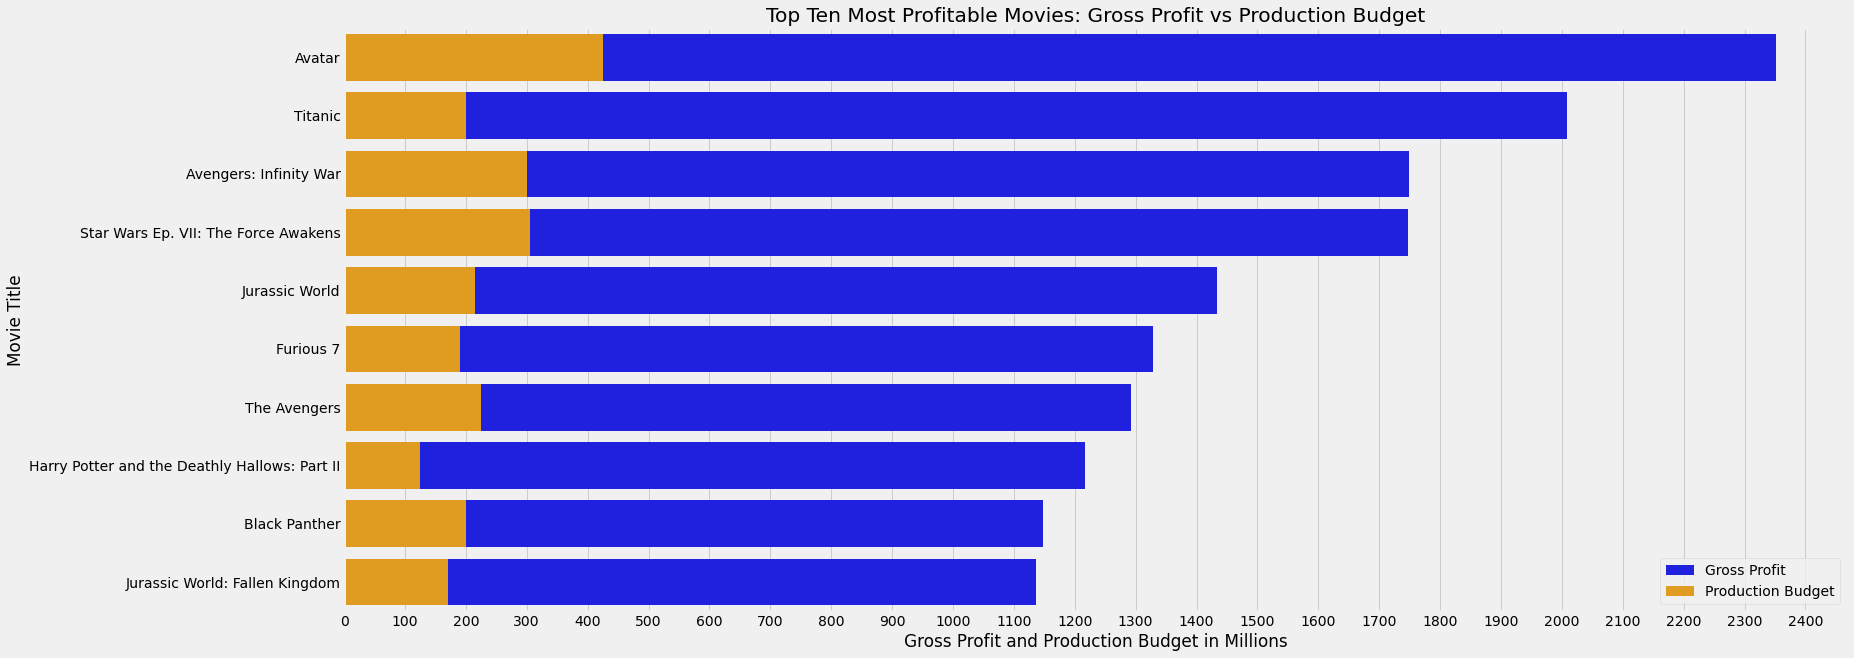

In [259]:
# Plotting Profit and Budget
fig, ax = plt.subplots(figsize=(24,10))
# Creates new df object to assist with plotting 
top_movies = tn_budgets_df.sort_values(by='gross_profit', ascending=False)[:10]

# Creates stacked bar plot showing total profit in blue, budget in yellow
sns.barplot(x='gross_profit', y='movie', data=top_movies, color='blue', ax=ax, label='Gross Profit')
sns.barplot(x='production_budget', y='movie', data=top_movies, color='orange', ax=ax, label='Production Budget')

# Labels and Titles
ax.set_xlabel("Gross Profit and Production Budget in Millions")
ax.set_ylabel("Movie Title")
ax.set_title("Top Ten Most Profitable Movies: Gross Profit vs Production Budget")
ax.legend()
plt.xticks(np.arange(0, 2420, 100));

# ADDING new column for ROI PROFIT/BUDGET

In [260]:
top_ten = tn_budgets_df.sort_values(by='roi', ascending=False)[:10]
top_ten

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
5745,46,"Jun 30, 1972",Deep Throat,0.025,45.000000,45.000000,44.975000,1972,1799.000000,1,Bottom 25
5613,14,"Mar 21, 1980",Mad Max,0.200,8.750000,99.750000,99.550000,1980,497.750000,1,Bottom 25
5492,93,"Sep 25, 2009",Paranormal Activity,0.450,107.918810,194.183034,193.733034,2009,430.517853,1,Bottom 25
5679,80,"Jul 10, 2015",The Gallows,0.100,22.764410,41.656474,41.556474,2015,415.564740,1,Bottom 25
5406,7,"Jul 14, 1999",The Blair Witch Project,0.600,140.539099,248.300000,247.700000,1999,412.833333,1,Bottom 25
5709,10,"May 7, 2004",Super Size Me,0.065,11.529368,22.233808,22.168808,2004,341.058585,1,Bottom 25
5346,47,"Aug 13, 1942",Bambi,0.858,102.797000,268.000000,267.142000,1942,311.354312,1,Bottom 25
5773,74,"Feb 26, 1993",El Mariachi,0.007,2.040920,2.041928,2.034928,1993,290.704000,1,Bottom 25
5676,77,"Oct 1, 1968",Night of the Living Dead,0.114,12.087064,30.087064,29.973064,1968,262.921614,1,Bottom 25
5210,11,"Nov 21, 1976",Rocky,1.000,117.235147,225.000000,224.000000,1976,224.000000,1,Bottom 25


In [261]:
tn_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000
mean,50.227701,33.308006,44.711279,97.687996,64.379990,2003.599446,4.125491,0.342752
std,28.765167,42.487580,69.609894,178.859114,149.858055,12.546965,30.487420,0.474673
min,1.000000,0.001100,0.000000,0.000026,-200.237650,1915.000000,-0.999974,0.000000
25%,25.000000,6.000000,3.160708,7.004834,-1.862081,1999.000000,-0.298948,0.000000
50%,50.000000,19.000000,20.300218,33.339868,11.900000,2006.000000,0.884921,0.000000
75%,75.000000,42.000000,55.782491,104.459004,67.379236,2012.000000,2.968780,1.000000
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,2019.000000,1799.000000,1.000000


# How do i find more than 40.00000 budget/roi, and less than

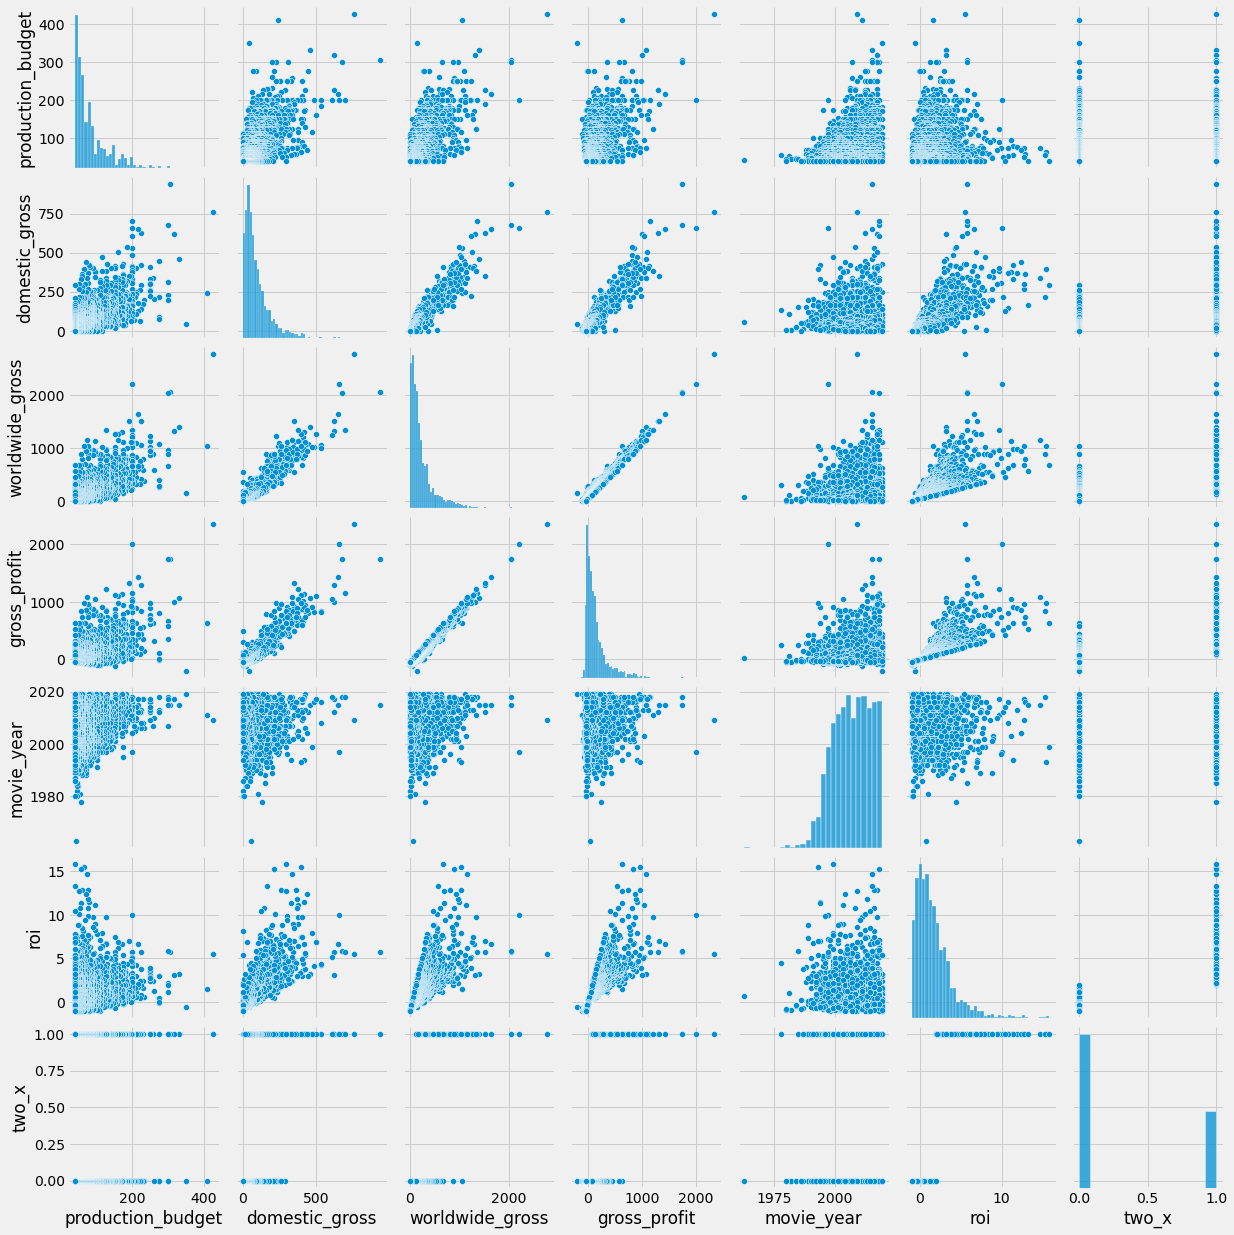

In [262]:
sns.pairplot(tn_budgets_df.loc[tn_budgets_df['production_budget'] >= 40.000000000].drop(columns='id'));

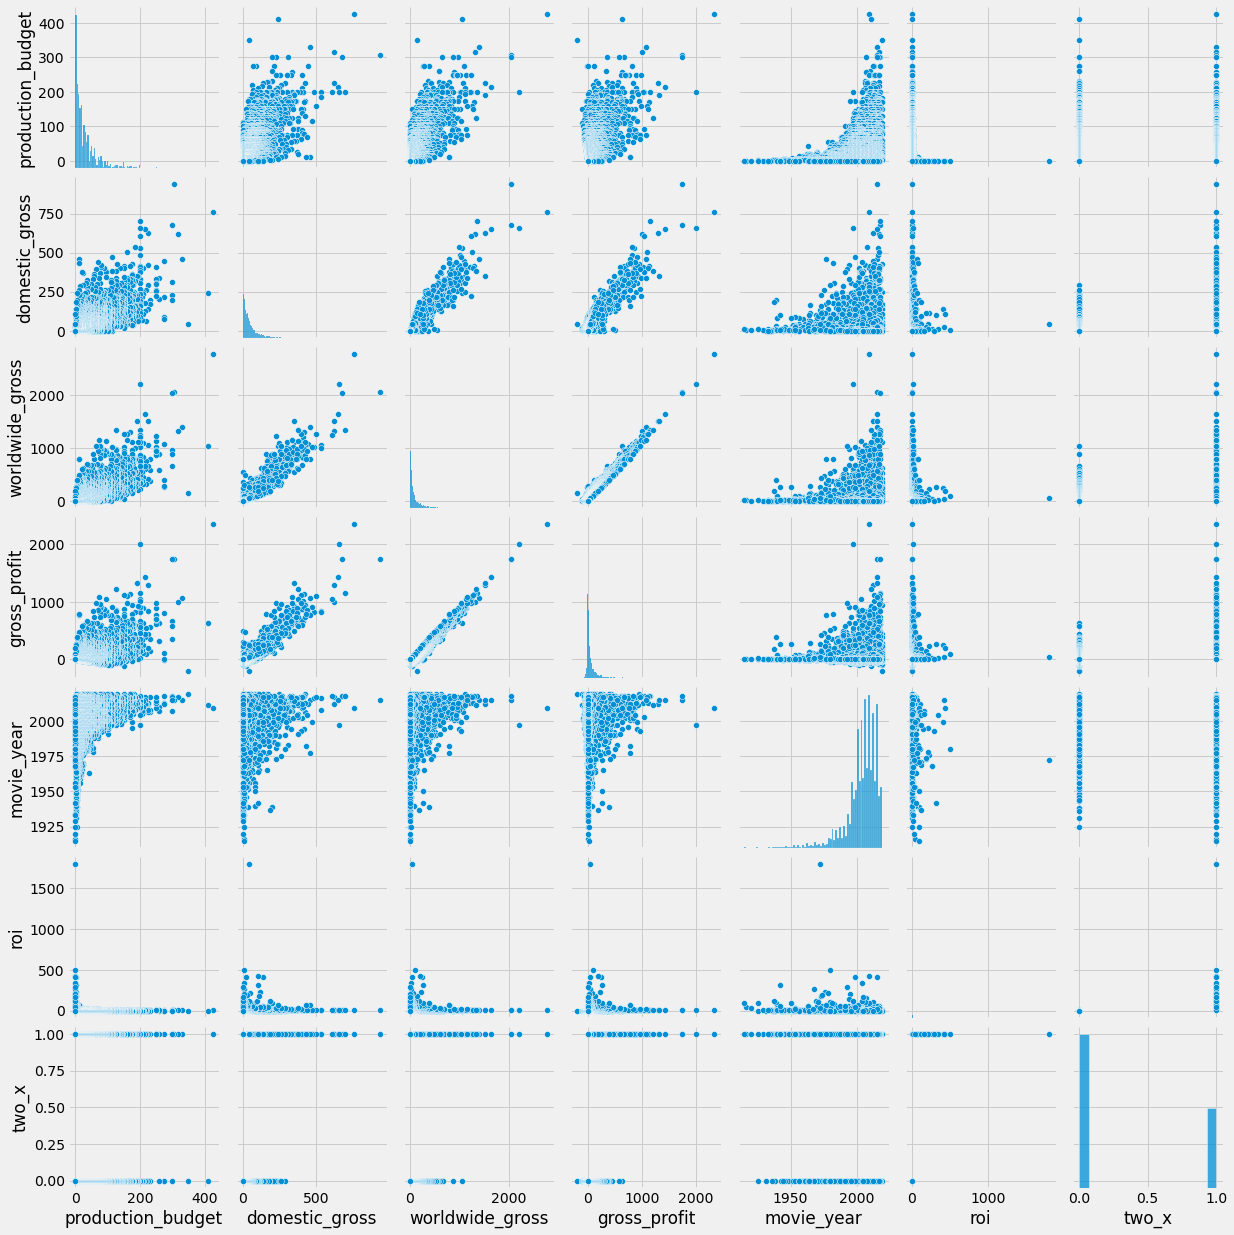

In [263]:
sns.pairplot(tn_budgets_df.drop(columns="id"));

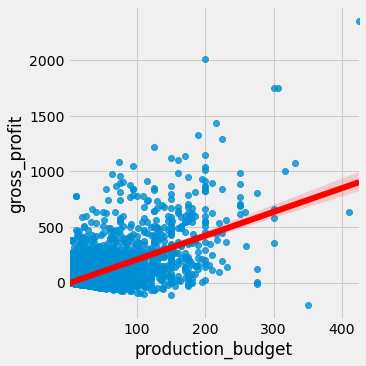

In [265]:
# reg plot for ALL movies profit/budget
sns.lmplot(y='gross_profit' , x='production_budget' , data=tn_budgets_df, line_kws={"color": "red"});

# Brake it into budget tiers

In [329]:
tn_budgets_df.shape
most_exp = tn_budgets_df.loc[tn_budgets_df['production_budget'] > 40.000]
inner_quartile = tn_budgets_df.loc[(tn_budgets_df['production_budget'] <= 40.000) & (
    tn_budgets_df['production_budget'] > 5.000)]
bottom_quartile = tn_budgets_df.loc[tn_budgets_df['production_budget'] <= 5.000]

In [330]:
tn_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000
mean,50.227701,33.308006,44.711279,97.687996,64.379990,2003.599446,4.125491,0.342752
std,28.765167,42.487580,69.609894,178.859114,149.858055,12.546965,30.487420,0.474673
min,1.000000,0.001100,0.000000,0.000026,-200.237650,1915.000000,-0.999974,0.000000
25%,25.000000,6.000000,3.160708,7.004834,-1.862081,1999.000000,-0.298948,0.000000
50%,50.000000,19.000000,20.300218,33.339868,11.900000,2006.000000,0.884921,0.000000
75%,75.000000,42.000000,55.782491,104.459004,67.379236,2012.000000,2.968780,1.000000
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,2019.000000,1799.000000,1.000000


In [331]:
tn_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009,5.532577,1,Top 25
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,2011,1.546673,0,Top 25


In [332]:
tn_budgets_df['quartile'].value_counts()

Bottom 25    1371
50-75        1363
25-50        1351
Top 25       1330
Name: quartile, dtype: int64

In [333]:
tn_budgets_df.groupby("quartile").agg(["min", 'mean', 'max', 'std'])["production_budget"]

,min,mean,max,std
quartile,,,,
Bottom 25,0.0011,2.580697,6.0,1.863067
25-50,6.1000,12.151278,19.0,3.547459
50-75,19.1000,29.095657,42.0,6.951888
Top 25,42.5000,90.790197,425.0,50.339778


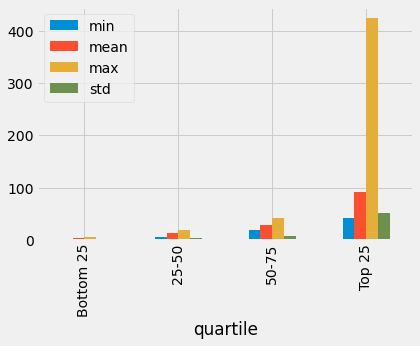

In [334]:
tn_budgets_df.groupby("quartile").agg(["min", 'mean', 'max', 'std'])["production_budget"].plot(kind='bar');

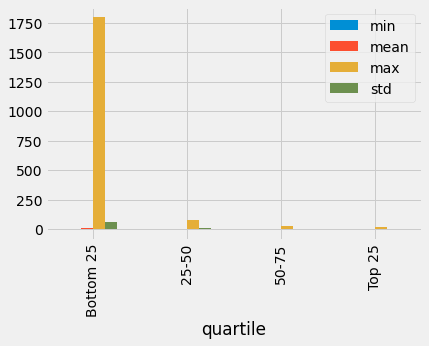

In [335]:
tn_budgets_df.groupby("quartile").agg(["min", 'mean', 'max', 'std'])["roi"].plot(kind='bar');

In [336]:
most_exp.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,49.820117,89.640207,104.367868,258.848669,169.208463,2006.701909,1.708437,0.334802
std,28.642838,50.294337,101.668907,278.833648,247.541462,7.400527,2.209224,0.472094
min,1.000000,41.000000,0.000000,0.022254,-200.237650,1963.000000,-0.999521,0.000000
25%,25.000000,55.000000,37.911200,77.630309,12.402068,2001.000000,0.181405,0.000000
50%,49.500000,72.000000,73.286518,166.957259,95.059053,2007.000000,1.186625,0.000000
75%,74.000000,109.750000,134.180891,335.802261,228.080669,2013.000000,2.594779,1.000000
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,2019.000000,15.489089,1.000000


In [337]:
# tn_budgets_df.sort_values(by='gross_profit', ascending=False)[:10]

In [338]:
top_coef = np.corrcoef(most_exp['production_budget'], most_exp['gross_profit'])
middle_coef = np.corrcoef(inner_quartile['production_budget'], inner_quartile['gross_profit'])
bottom_coef = np.corrcoef(bottom_quartile['production_budget'], bottom_quartile['gross_profit'])

print(f"""
The correlation between budget and profit for the TOP 25% of budgets is {top_coef[0][1]}.
The correlation between budget and profit for the INNER QUARTILE RANGE of budgets is {middle_coef[0][1]}.
The correlation between budget and profit for the BOTTOM 25% of budgets is {bottom_coef[0][1]}.""")


The correlation between budget and profit for the TOP 25% of budgets is 0.5599189597988767.
The correlation between budget and profit for the INNER QUARTILE RANGE of budgets is 0.13819418606980372.
The correlation between budget and profit for the BOTTOM 25% of budgets is 0.16729982408727181.


In [339]:
top_roi_coef = np.corrcoef(most_exp['production_budget'], most_exp['roi'])
middle_roi_coef = np.corrcoef(inner_quartile['production_budget'], inner_quartile['roi'])
bottom_roi_coef = np.corrcoef(bottom_quartile['production_budget'], bottom_quartile['roi'])

print(f"""
The correlation between budget and ROI for the TOP 25% of budgets is {top_roi_coef[0][1]}.
The correlation between budget and ROI for the INNER QUARTILE RANGE of budgets is {middle_roi_coef[0][1]}.
The correlation between budget and ROI for the BOTTOM 25% of budgets is {bottom_roi_coef[0][1]}.""")


The correlation between budget and ROI for the TOP 25% of budgets is 0.14467999757037522.
The correlation between budget and ROI for the INNER QUARTILE RANGE of budgets is -0.10212001315350722.
The correlation between budget and ROI for the BOTTOM 25% of budgets is -0.13326756709370383.


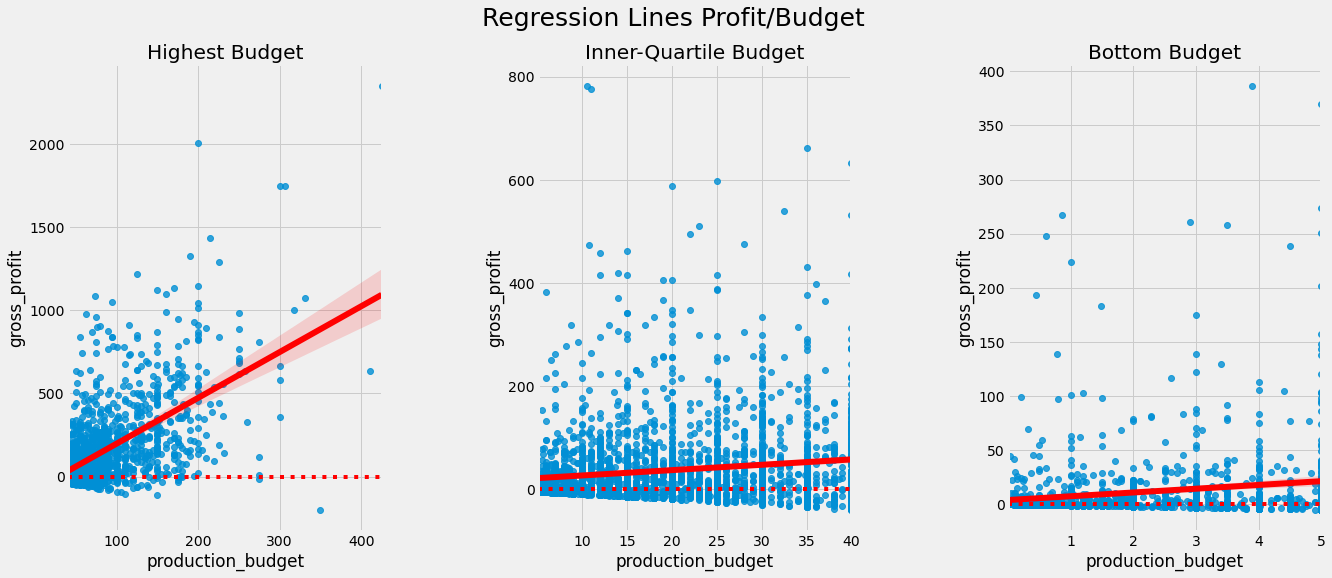

In [340]:
fig, ax = plt.subplots(ncols=3, figsize=(20,8))
sns.regplot(x="production_budget", y="gross_profit", data=most_exp, ax=ax[0], line_kws={"color": "red"})
ax[0].set_title("Highest Budget")
ax[0].axhline(y=0, color='red', linestyle='dotted')

sns.regplot(x="production_budget", y="gross_profit", data=inner_quartile, ax=ax[1], line_kws={"color": "red"})
ax[1].set_title("Inner-Quartile Budget")
ax[1].axhline(y=0, color='red', linestyle='dotted')

sns.regplot(x="production_budget", y="gross_profit", data=bottom_quartile, ax=ax[2], line_kws={"color": "red"})
ax[2].axhline(y=0, color='red', linestyle='dotted')
ax[2].set_title("Bottom Budget")

plt.subplots_adjust(hspace=0.0, wspace=.5)
plt.suptitle("Regression Lines Profit/Budget", fontsize=25)
plt.show();

# Percentage of Unprofitable Movies By Budget

# IMPORTANT

In [341]:
perc_loss_exp = len(most_exp.loc[most_exp['gross_profit'] <=0]) / len(most_exp)
perc_loss_mid = len(inner_quartile.loc[inner_quartile['gross_profit'] <=0]) / len(inner_quartile)
perc_loss_bot = len(bottom_quartile.loc[bottom_quartile['gross_profit'] <=0]) / len(bottom_quartile)

print("More Than 40M:", perc_loss_exp, "| Between 5-40M", perc_loss_mid, "| Less Than 5M", perc_loss_bot)

More Than 40M: 0.20704845814977973 | Between 5-40M 0.35444839857651245 | Less Than 5M 0.38616251005631536


In [342]:
most_exp.loc[most_exp['gross_profit'] >=0].describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,50.867593,94.804964,125.175670,315.341593,220.536629,2007.249074,2.262861,0.422222
std,28.434567,52.770759,104.268119,287.003036,253.820639,7.343044,2.156261,0.494142
min,1.000000,41.000000,0.000000,46.414530,0.047784,1963.000000,0.000265,0.000000
25%,27.000000,55.000000,57.374082,131.042272,59.593280,2002.000000,0.790861,0.000000
50%,52.000000,78.000000,94.917101,215.931156,136.144912,2008.000000,1.685764,0.000000
75%,75.000000,120.000000,155.923192,381.470714,278.380170,2013.000000,3.039606,1.000000
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,2019.000000,15.489089,1.000000


# Modeling upper quartile of budgets

In [343]:
endog = most_exp['roi']  # dependent
exog = sm.add_constant(most_exp['production_budget'])  # independent
lin_reg_model = sm.OLS(endog, exog).fit() 

In [344]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     29.08
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           8.19e-08
Time:                        17:17:58   Log-Likelihood:                -2997.3
No. Observations:                1362   AIC:                             5999.
Df Residuals:                    1360   BIC:                             6009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1388      0.121      9.401      0.000       0.901       1.376
production_budget     0.0064      0.001      5.392      0.000       0.004       0.009
==============================================================================
Omnibus:                      636.281   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3761.962
Skew:                           2.125   Prob(JB):                         0.00
Kurtosis:                       9.945   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

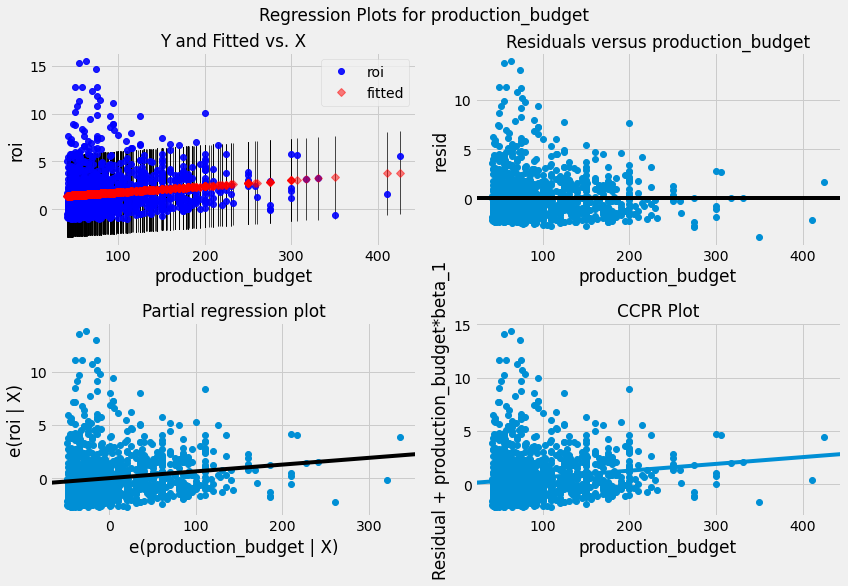

In [345]:
# roi as a function of production budget, for every million spent, roi increases by .0065

sm.graphics.plot_regress_exog(lin_reg_model, 'production_budget', fig=plt.figure(figsize=(12, 8)));

applied to this data

In [346]:
# X = most_exp.loc[:, ["production_budget"]]
# ss = StandardScaler().fit(X)
# X_scaled = ss.transform(X)
# endog = most_exp['roi']  # dependent
# exog = sm.add_constant(X_scaled)  # independent
# lin_reg_model = sm.OLS(endog, exog)
# lin_reg_model.fit() 
# lin_reg_model.fit().summary()


X_c = sm.add_constant(most_exp['production_budget'])
y = most_exp['gross_profit']
model = sm.OLS(endog=y, exog=X_c).fit()

In [348]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     621.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          3.15e-113
Time:                        17:20:46   Log-Likelihood:                -9182.7
No. Observations:                1362   AIC:                         1.837e+04
Df Residuals:                    1360   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -77.8256     11.365     -6.848      0.000    -100.121     -55.531
production_budget     2.7558      0.111     24.922      0.000       2.539       2.973
==============================================================================
Omnibus:                      533.074   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3702.561
Skew:                           1.655   Prob(JB):                         0.00
Kurtosis:                      10.368   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

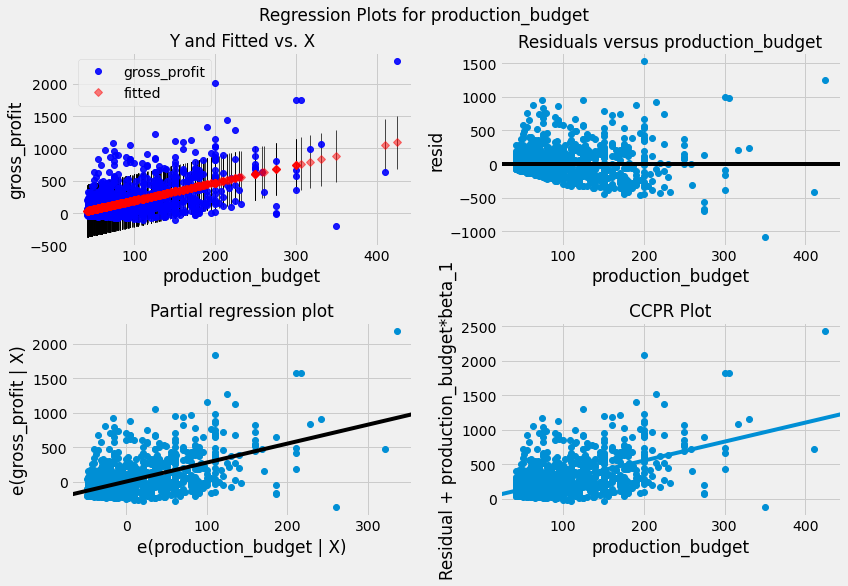

In [349]:
# y = gross profit, x = production_budget, for every 1M spent, profit increases by 2.75M, 
# but there is a negative intercept

sm.graphics.plot_regress_exog(model, 'production_budget', fig=plt.figure(figsize=(12, 8)));

# Removing the outlier most profitable films

In [350]:
no_outliers = most_exp.loc[most_exp['gross_profit'] < 1000, 'gross_profit']
X_c = sm.add_constant(most_exp.loc[most_exp['gross_profit'] < 1000, 'production_budget'])
y = no_outliers
model_wo_outliers = sm.OLS(endog=y, exog=X_c).fit()

In [351]:
no_outliers.describe()

count    1345.000000
mean      154.323385
std       206.111299
min      -200.237650
25%        11.971293
50%        90.808837
75%       221.872367
max       999.721747
Name: gross_profit, dtype: float64

# Model for films costing more than 40M and making less than 1B

In [352]:
model_wo_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     458.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           8.60e-88
Time:                        17:21:18   Log-Likelihood:                -8877.1
No. Observations:                1345   AIC:                         1.776e+04
Df Residuals:                    1343   BIC:                         1.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -37.4856     10.186     -3.680      0.000     -57.468     -17.503
production_budget     2.1766      0.102     21.419      0.000       1.977       2.376
==============================================================================
Omnibus:                      346.897   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1138.906
Skew:                           1.256   Prob(JB):                    4.89e-248
Kurtosis:                       6.743   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

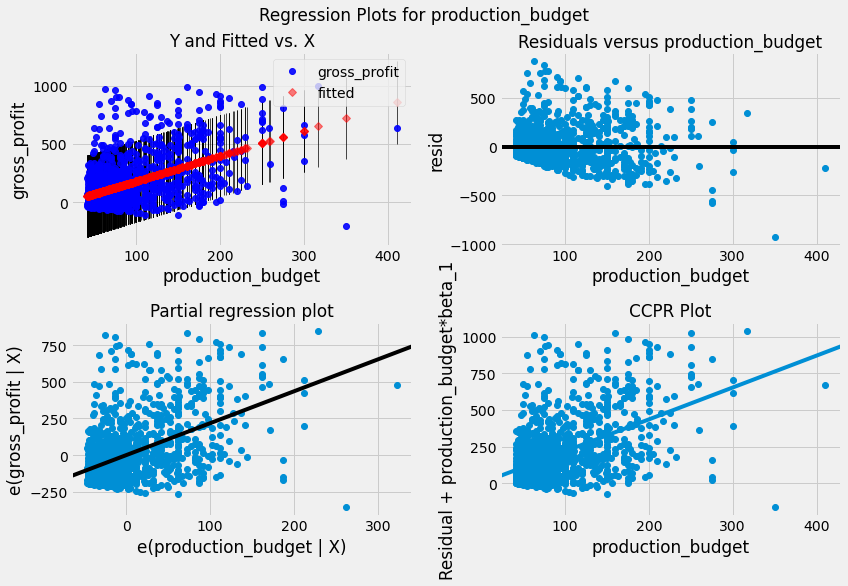

In [353]:
sm.graphics.plot_regress_exog(model_wo_outliers, 'production_budget', fig=plt.figure(figsize=(12, 8)));

In [354]:
# same plot as above except plotting ROI/budget

no_outliers_roi = most_exp.loc[most_exp['gross_profit'] < 1000, 'roi']
X_c_roi = sm.add_constant(most_exp.loc[most_exp['gross_profit'] < 1000, 'production_budget'])
y = no_outliers_roi
roi_model_wo_outliers = sm.OLS(endog=y, exog=X_c_roi).fit()
roi_model_wo_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           0.000320
Time:                        17:21:29   Log-Likelihood:                -2907.8
No. Observations:                1345   AIC:                             5820.
Df Residuals:                    1343   BIC:                             5830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2572      0.120     10.443      0.000       1.021       1.493
production_budget     0.0043      0.001      3.608      0.000       0.002       0.007
==============================================================================
Omnibus:                      624.035   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3752.714
Skew:                           2.098   Prob(JB):                         0.00
Kurtosis:                      10.025   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Median 40M+ budget excluding outliers earns 1.16x ROI

In [355]:
no_outliers_roi.describe()

count    1345.000000
mean        1.639038
std         2.113168
min        -0.999521
25%         0.170048
50%         1.163873
75%         2.517854
max        15.489089
Name: roi, dtype: float64

### Pearson's Correlation for ROI and Budget = 0.098, almost .1, very low positive correlation

In [356]:
corr_check = most_exp.loc[most_exp['gross_profit'] < 1000, ["roi", "production_budget"]]
np.corrcoef(corr_check['roi'], corr_check['production_budget'])

array([[1.        , 0.09798536],
       [0.09798536, 1.        ]])

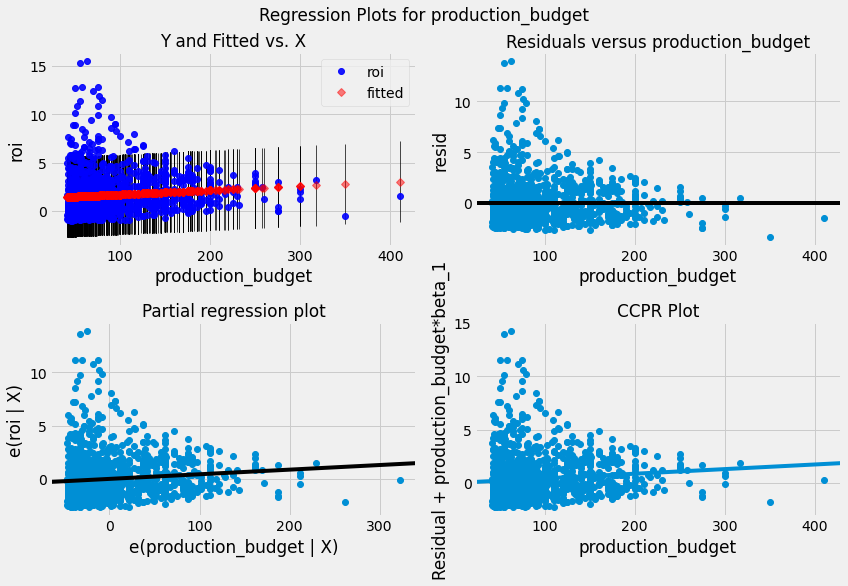

In [357]:
sm.graphics.plot_regress_exog(roi_model_wo_outliers, 'production_budget', fig=plt.figure(figsize=(12, 8)));

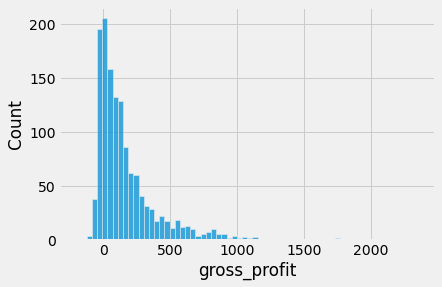

In [358]:
sns.histplot(x='gross_profit', data=most_exp);

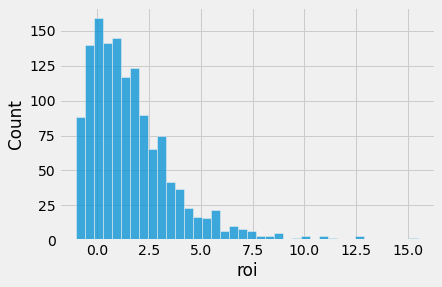

In [359]:
sns.histplot(x='roi', data=most_exp, bins='auto');

In [360]:
most_exp['roi'].max()

15.489088634920636

# Identify top 10% of ROI's within each of the 3 budget tiers

In [361]:
exp_index = int(len(most_exp) - np.floor((.9 * len(most_exp))))
top_ten_perc_exp = most_exp.sort_values(by="roi", ascending = False)[:exp_index]
top_ten_perc_exp.shape

(137, 11)

In [362]:
mid_index = int(len(inner_quartile) - np.floor((.9 * len(inner_quartile))))
top_ten_perc_mid = inner_quartile.sort_values(by="roi", ascending = False)[:exp_index]
top_ten_perc_mid.shape

(137, 11)

In [363]:
bot_index = int(len(bottom_quartile) - np.floor((.9 * len(bottom_quartile))))
top_ten_perc_bot = bottom_quartile.sort_values(by="roi", ascending = False)[:exp_index]
top_ten_perc_bot.shape

(137, 11)

# Only looking at recent movies! - After the year 1996

In [364]:
top_ten_perc_bot.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,53.430657,1.589608,40.474730,70.107045,68.517436,1989.970803,85.769212,1.0
std,26.840157,1.664005,45.184396,77.345275,76.252356,23.885124,171.602096,0.0
min,1.000000,0.001100,0.000000,0.181041,0.179941,1915.000000,17.397750,1.0
25%,30.000000,0.200000,7.159147,11.000000,10.890000,1976.000000,25.028413,1.0
50%,59.000000,1.000000,23.894000,42.411721,41.556474,1998.000000,39.082500,1.0
75%,75.000000,3.000000,55.683845,99.750000,97.200000,2007.000000,85.566689,1.0
max,100.000000,5.000000,241.438208,390.525192,386.625192,2018.000000,1799.000000,1.0


In [365]:
top_ten_perc_exp.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
824,25,"Jun 11, 1993",Jurassic Park,63.0,395.708305,1038.812584,975.812584,1993,15.489089,1,Top 25
983,84,"Nov 2, 2018",Bohemian Rhapsody,55.0,216.303339,894.985342,839.985342,2018,15.272461,1,Top 25


In [366]:
top_ten_perc_mid.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10.5,435.110554,792.965326,782.465326,1982,74.520507,1,25-50
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11.0,460.998007,786.598007,775.598007,1977,70.508910,1,25-50


In [367]:
top_ten_perc_bot.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
5745,46,"Jun 30, 1972",Deep Throat,0.025,45.00,45.00,44.975,1972,1799.00,1,Bottom 25
5613,14,"Mar 21, 1980",Mad Max,0.200,8.75,99.75,99.550,1980,497.75,1,Bottom 25


In [368]:
top_budget = top_ten_perc_exp.loc[top_ten_perc_exp['movie_year'] > 1996]
middle_budget = top_ten_perc_mid.loc[top_ten_perc_mid['movie_year'] > 1996]
bottom_budget = top_ten_perc_bot.loc[top_ten_perc_bot['movie_year'] > 1996]

In [369]:
top_budget.shape

(121, 11)

In [370]:
middle_budget.shape

(72, 11)

In [371]:
bottom_budget.shape

(76, 11)

In [422]:
top_budget.sort_values(by="gross_profit", ascending=False)[:12].describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,32.666667,222.166667,588.969260,1691.575537,1469.408870,2013.166667,6.919053,1.0
std,22.398593,83.958684,178.807344,478.178564,405.750832,5.874960,1.521117,0.0
min,1.000000,125.000000,353.007020,1259.199706,1099.199706,1997.000000,5.532577,1.0
25%,11.500000,167.500000,413.474322,1332.713068,1145.136868,2011.750000,5.745109,1.0
50%,34.500000,200.000000,637.775086,1518.329346,1310.829346,2015.000000,6.675054,1.0
75%,46.250000,243.750000,684.126503,2049.428455,1747.516965,2017.250000,7.115742,1.0
max,67.000000,425.000000,936.662225,2776.345279,2351.345279,2018.000000,10.041042,1.0


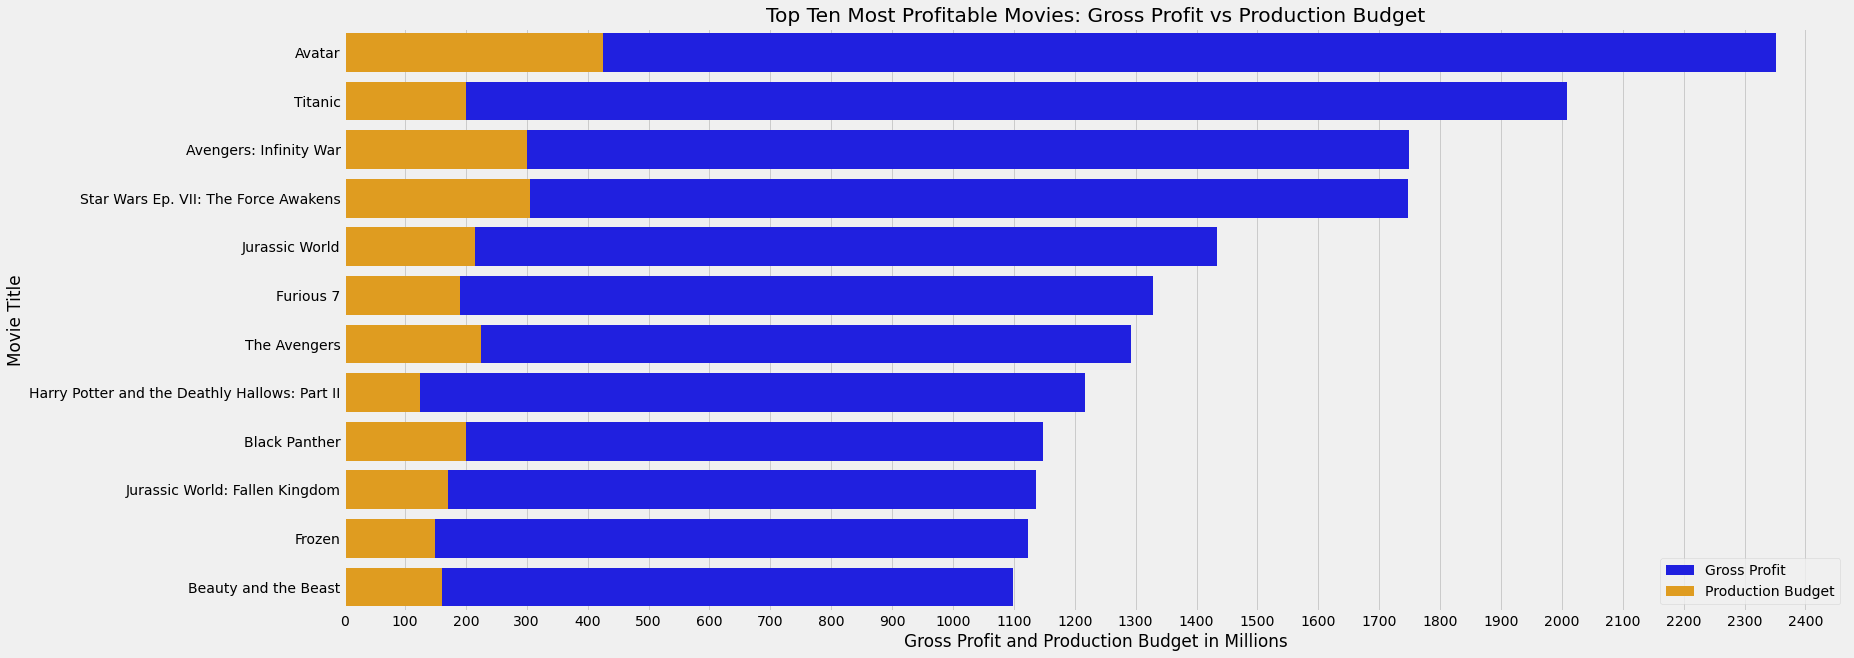

In [377]:
# Plotting Profit and Budget
fig, ax = plt.subplots(figsize=(24,10))
# Creates new df object to assist with plotting 
top_movies = top_budget.sort_values(by="gross_profit", ascending=False)[:12]

# Creates stacked bar plot showing total profit in blue, budget in yellow
sns.barplot(x='gross_profit', y='movie', data=top_movies, color='blue', ax=ax, label='Gross Profit')
sns.barplot(x='production_budget', y='movie', data=top_movies, color='orange', ax=ax, label='Production Budget')

# Labels and Titles
ax.set_xlabel("Gross Profit and Production Budget in Millions")
ax.set_ylabel("Movie Title")
ax.set_title("Top Ten Most Profitable Movies: Gross Profit vs Production Budget")
ax.legend()
plt.xticks(np.arange(0, 2420, 100));

In [421]:
middle_budget.sort_values(by="gross_profit", ascending=False)[:12].describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,60.000000,28.983333,201.192135,504.098475,475.115141,2010.833333,19.497932,1.0
std,32.777487,11.270382,100.645798,108.454469,104.703356,5.654175,9.917743,0.0
min,5.000000,10.800000,13.182281,384.530440,365.280159,1999.000000,9.872437,1.0
25%,24.750000,18.750000,140.697390,429.703667,404.125765,2008.000000,11.990725,1.0
50%,74.500000,35.000000,179.468542,461.635931,424.135931,2011.000000,17.373764,1.0
75%,84.500000,37.750000,281.368450,583.834057,547.584057,2015.250000,24.536873,1.0
max,97.000000,40.000000,370.782930,697.457969,662.457969,2018.000000,43.895652,1.0


/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


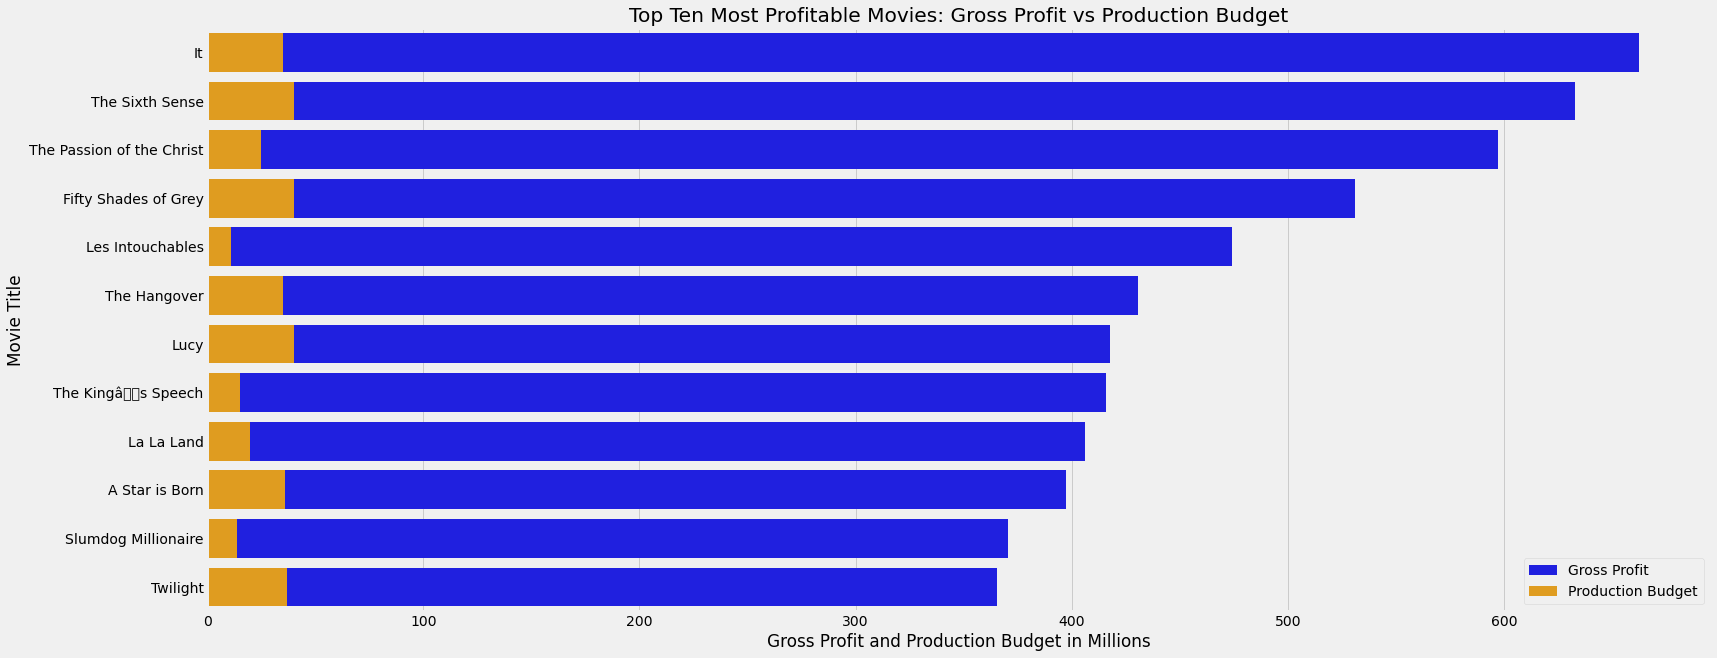

In [382]:
# Plotting Profit and Budget
fig, ax = plt.subplots(figsize=(24,10))
# Creates new df object to assist with plotting 
top_movies = middle_budget.sort_values(by="gross_profit", ascending=False)[:12]

# Creates stacked bar plot showing total profit in blue, budget in yellow
sns.barplot(x='gross_profit', y='movie', data=top_movies, color='blue', ax=ax, label='Gross Profit')
sns.barplot(x='production_budget', y='movie', data=top_movies, color='orange', ax=ax, label='Production Budget')

# Labels and Titles
ax.set_xlabel("Gross Profit and Production Budget in Millions")
ax.set_ylabel("Movie Title")
ax.set_title("Top Ten Most Profitable Movies: Gross Profit vs Production Budget")
ax.legend()
plt.xticks(np.arange(0, 700, 100));

In [420]:
bottom_budget.sort_values(by="gross_profit", ascending=False)[:12].describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,56.000000,3.962500,110.882576,216.998183,213.035683,2009.000000,109.309274,1.0
std,21.775716,1.742402,55.865948,69.183794,69.233737,6.849021,146.865504,0.0
min,7.000000,0.450000,45.950122,142.817992,137.817992,1997.000000,27.563598,1.0
25%,49.750000,3.375000,79.507044,159.672410,154.672410,2004.250000,30.934482,1.0
50%,52.500000,5.000000,95.526950,200.611439,197.886439,2010.500000,52.433276,1.0
75%,60.500000,5.000000,138.740963,256.838309,252.213309,2013.750000,73.726512,1.0
max,93.000000,5.000000,241.438208,374.890034,369.890034,2017.000000,430.517853,1.0


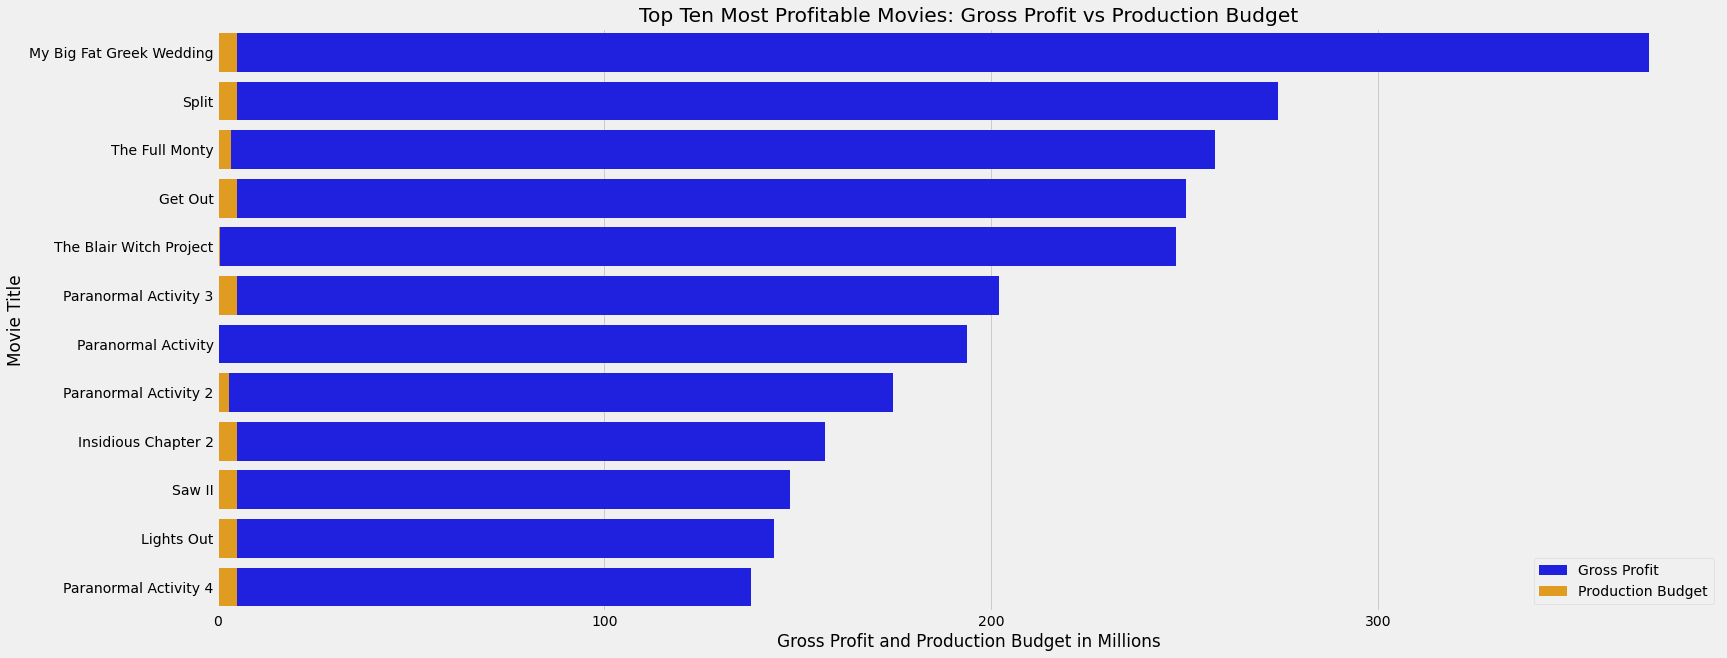

In [381]:
# Plotting Profit and Budget
fig, ax = plt.subplots(figsize=(24,10))
# Creates new df object to assist with plotting 
top_movies = bottom_budget.sort_values(by="gross_profit", ascending=False)[:12]

# Creates stacked bar plot showing total profit in blue, budget in yellow
sns.barplot(x='gross_profit', y='movie', data=top_movies, color='blue', ax=ax, label='Gross Profit')
sns.barplot(x='production_budget', y='movie', data=top_movies, color='orange', ax=ax, label='Production Budget')

# Labels and Titles
ax.set_xlabel("Gross Profit and Production Budget in Millions")
ax.set_ylabel("Movie Title")
ax.set_title("Top Ten Most Profitable Movies: Gross Profit vs Production Budget")
ax.legend()
plt.xticks(np.arange(0, 400, 100));

In [425]:
top_budget.sort_values(by="gross_profit", ascending=False)[:25]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,movie_year,roi,two_x,quartile
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009,5.532577,1,Top 25
42,43,"Dec 19, 1997",Titanic,200.0,659.363944,2208.208395,2008.208395,1997,10.041042,1,Top 25
6,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200,2018,5.827114,1,Top 25
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220,2015,5.710167,1,Top 25
33,34,"Jun 12, 2015",Jurassic World,215.0,652.270625,1648.854864,1433.854864,2015,6.669092,1,Top 25
66,67,"Apr 3, 2015",Furious 7,190.0,353.007020,1518.722794,1328.722794,2015,6.993278,1,Top 25
26,27,"May 4, 2012",The Avengers,225.0,623.279547,1517.935897,1292.935897,2012,5.746382,1,Top 25
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125.0,381.193157,1341.693157,1216.693157,2011,9.733545,1,Top 25
41,42,"Feb 16, 2018",Black Panther,200.0,700.059566,1348.258224,1148.258224,2018,5.741291,1,Top 25
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,1135.772799,2018,6.681016,1,Top 25


# Trying to use a logorhythmic model!

In [81]:
stats.lognorm.cdf(x=15.4, loc=np.mean(most_exp['roi']), s=np.std(most_exp['roi']))

0.8816275069908828

In [83]:
shape, loc, scale = stats.lognorm.fit(most_exp['roi'])

In [84]:
shape, loc, scale

(0.6324309143898441, -1.597420655093153, 2.6970978284573457)

In [ ]:
X_c = sm.add_constant(most_exp['production_budget'])
y = most_exp['gross_profit']
model = sm.Logit(endog=y, exog=X_c).fit()

In [ ]:
#### 'x1' is the carat variable
sm.graphics.plot_regress_exog(model, 'x1', fig=plt.figure(figsize=(12, 8)));

In [415]:
np.mean(most_exp['roi'])
most_exp.loc[
    most_exp['roi'] > np.mean(most_exp['roi']), 'roi'].agg(['min', 'max', 'mean'])

min      1.655949
max     15.820157
mean     3.680663
Name: roi, dtype: float64

In [423]:
most_exp['roi'].describe()

count    1544.000000
mean        1.654378
std         2.244614
min        -1.000000
25%         0.103835
50%         1.130493
75%         2.568507
max        15.820157
Name: roi, dtype: float64

In [430]:
most_exp.loc[
    most_exp['roi'] > np.mean(most_exp['roi']), 'roi'].sort_values(ascending=False)

1374    15.820157
824     15.489089
983     15.272461
672     14.680219
1377    13.274953
          ...    
450      1.659711
145      1.659514
39       1.659504
778      1.658859
889      1.655949
Name: roi, Length: 614, dtype: float64

In [454]:
most_exp[most_exp['two_x'] == 1]['roi'].sort_values(ascending=True)

325      2.007091
273      2.008000
1139     2.008587
130      2.009161
1403     2.011400
          ...    
1377    13.274953
672     14.680219
983     15.272461
824     15.489089
1374    15.820157
Name: roi, Length: 509, dtype: float64

In [455]:
most_exp[most_exp['two_x'] == 1]['roi'].describe()

count    509.000000
mean       4.065081
std        2.286014
min        2.007091
25%        2.578242
50%        3.271344
75%        4.710397
max       15.820157
Name: roi, dtype: float64

In [456]:
most_exp['two_x'].value_counts(normalize=True)

0    0.670337
1    0.329663
Name: two_x, dtype: float64

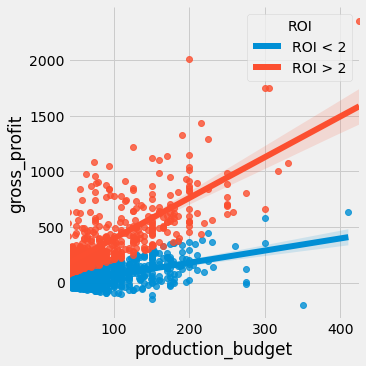

In [457]:
sns.lmplot(x='production_budget', y='gross_profit', data=most_exp, hue='two_x', legend=False)
legend_labels = {True: 'ROI < 2', False: 'ROI > 2'}

plt.legend(title='ROI', labels=legend_labels.values());


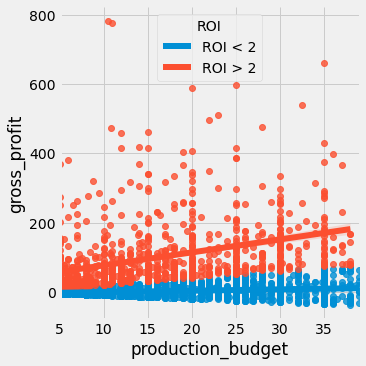

In [460]:
sns.lmplot(x='production_budget', y='gross_profit', data=inner_quartile, hue='two_x', legend=False)
legend_labels = {True: 'ROI < 2', False: 'ROI > 2'}

plt.legend(title='ROI', labels=legend_labels.values());


In [348]:
most_exp['roi'].describe()

count    1544.000000
mean        1.654378
std         2.244614
min        -1.000000
25%         0.103835
50%         1.130493
75%         2.568507
max        15.820157
Name: roi, dtype: float64

In [197]:
most_exp.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,roi,price_tier,quartile,two_x
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,5.532577,425,Top 25,1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,1.546673,410.6,Top 25,0


In [357]:
tn_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,roi,movie_year
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,5.532577,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,1.546673,2011


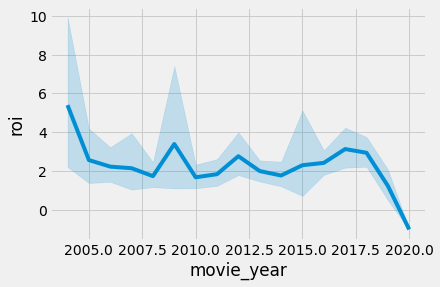

In [359]:
sns.lineplot(x='movie_year', y='roi', data=tn_budgets_df.loc[tn_budgets_df['movie_year'] > 2003]);

<AxesSubplot:xlabel='roi', ylabel='Density'>

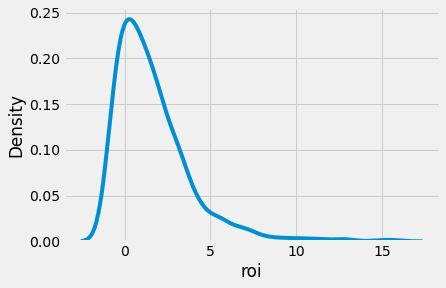

In [349]:
sns.kdeplot(x='roi', data=most_exp);

<AxesSubplot:xlabel='roi', ylabel='Count'>

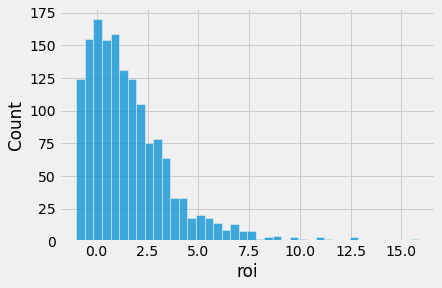

In [346]:
sns.histplot(x='roi', data=most_exp);


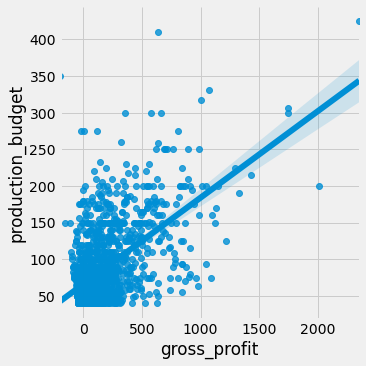

In [328]:
sns.lmplot(x='gross_profit' , y='production_budget' , data=most_exp);

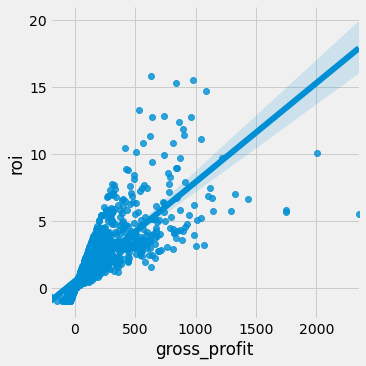

In [339]:
sns.lmplot(x='gross_profit' , y='roi' , data=most_exp);

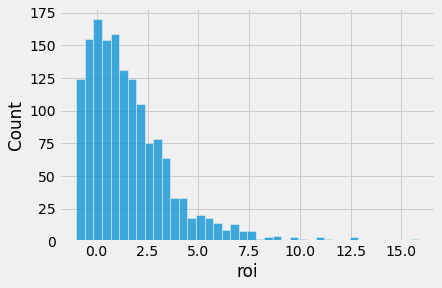

In [332]:
sns.histplot(most_exp["roi"]);

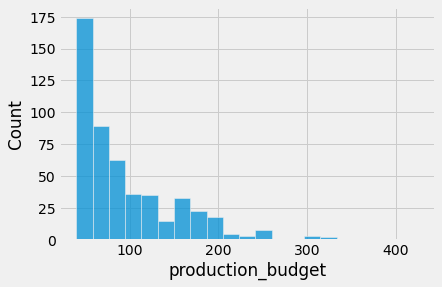

In [336]:
sns.histplot(most_exp.loc[most_exp['roi'] > 2, "production_budget"]);

In [322]:
inner_quartile.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,roi
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,50.931373,17.647674,29.223004,51.444425,33.796750,2.235714
std,28.837989,9.296044,40.067638,74.578830,72.792265,5.428049
min,1.000000,5.000000,0.000000,0.000000,-37.376626,-1.000000
25%,26.000000,10.000000,3.590625,8.283002,-5.391095,-0.454873
50%,51.000000,16.000000,16.308179,26.551624,10.111476,0.674682
75%,76.000000,25.000000,39.128652,63.840938,44.110979,2.648879
max,100.000000,39.000000,460.998007,792.965326,782.465326,74.520507


In [327]:
mu = np.mean(inner_quartile['roi'])
sigma = np.std(inner_quartile['roi'])

5.427098381741725

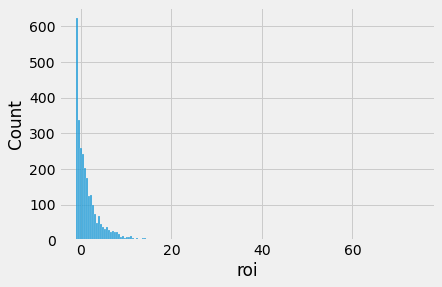

In [330]:
sns.histplot(inner_quartile["roi"]);

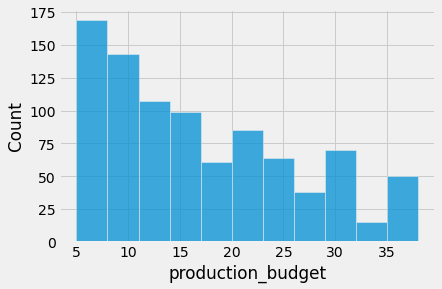

In [335]:
sns.histplot(inner_quartile.loc[inner_quartile['roi'] > 2, "production_budget"], );

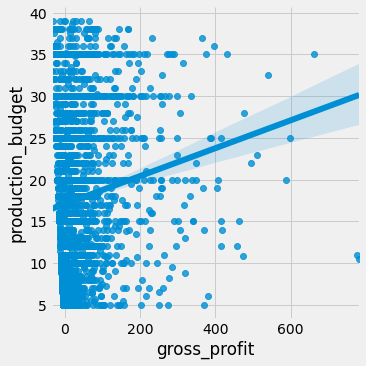

In [318]:
sns.lmplot(x='gross_profit' , y='production_budget' , data=inner_quartile);

In [321]:
bottom_quartile.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,roi
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,49.965991,1.785378,6.066987,9.496835,7.711457,9.430517
std,28.673464,1.370551,16.426260,26.992648,26.797903,59.514366
min,1.000000,0.001100,0.000000,0.000000,-4.884802,-1.000000
25%,25.000000,0.500000,0.000449,0.008593,-1.008437,-0.988447
50%,50.000000,1.500000,0.320091,0.840535,-0.025159,-0.224250
75%,74.750000,3.000000,4.381074,7.588814,5.121463,4.073944
max,100.000000,4.900000,198.680470,390.525192,386.625192,1799.000000


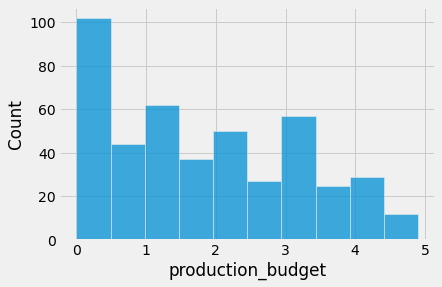

In [334]:
sns.histplot(bottom_quartile.loc[bottom_quartile['roi'] > 2, "production_budget"]);

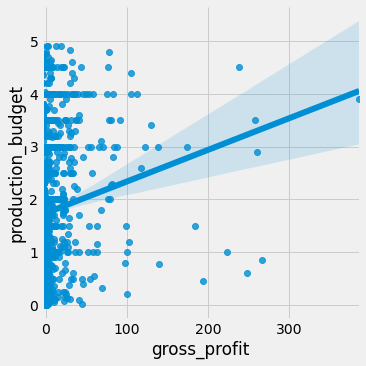

In [320]:
sns.lmplot(x='gross_profit' , y='production_budget' , data=bottom_quartile);

In [305]:
tn_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,gross_profit,roi
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487461,59.899704,3.800161
std,28.821076,41.812077,68.240597,174.719969,146.088881,29.530282
min,1.000000,0.001100,0.000000,0.000000,-200.237650,-1.000000
25%,25.000000,5.000000,1.429534,4.125415,-2.189071,-0.507704
50%,50.000000,17.000000,17.225945,27.984448,8.550286,0.708310
75%,75.000000,40.000000,52.348662,97.645837,60.968502,2.758346
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,1799.000000


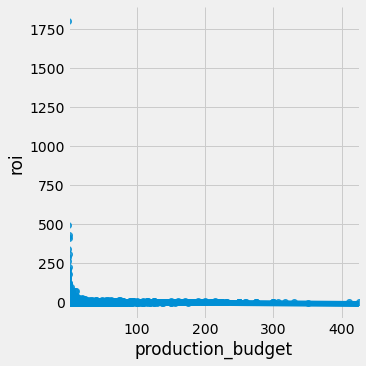

In [309]:
sns.lmplot(y='roi' , x='production_budget' , data=tn_budgets_df);

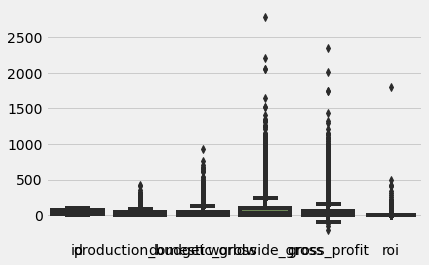

In [307]:
sns.boxplot(data=tn_budgets_df);

In [277]:
# top_movies = tn_budgets_df.sort_values(by='gross_profit', ascending=False)[:10]

# # Creates stacked bar plot showing total profit in blue, budget in yellow
# sns.barplot(x='gross_profit', y='movie', data=top_movies, color='blue', ax=ax, label='Gross Profit')
# sns.barplot(x='production_budget', y='movie', data=top_movies, color='orange', ax=ax, label='Production Budget')

# # Labels and Titles
# ax.set_xlabel("Gross Profit and Production Budget in Millions")
# ax.set_ylabel("Movie Title")
# ax.set_title("Top Ten Most Profitable Movies: Gross Profit vs Production Budget")
# ax.legend()
# plt.xticks(np.arange(0, 2500, 100));

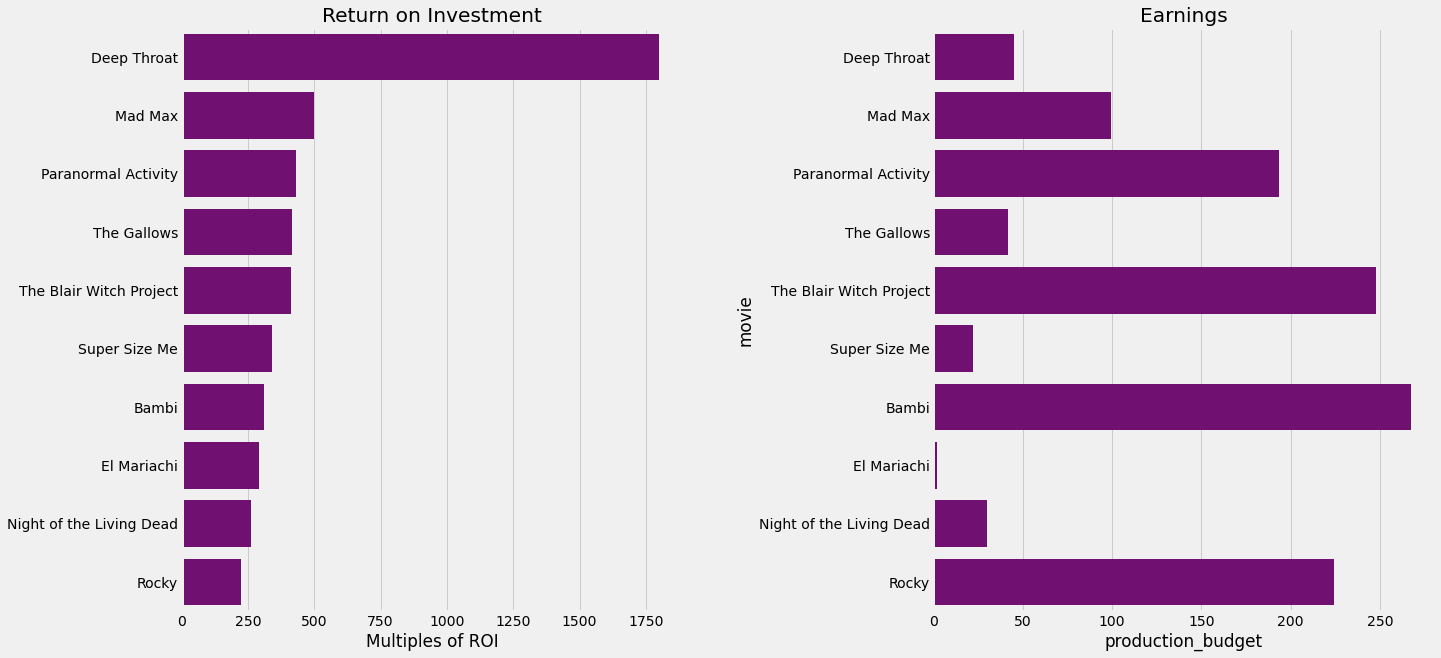

In [278]:
# chart illustrating the top 10 ROI's for movies in our data
greens = sns.color_palette("PuBuGn_r", 25)
fig, ax = plt.subplots(ncols=2, figsize=(20,10), gridspec_kw={'wspace': .5})

# chart ROI for highest ROI films
ax[0].set_yticklabels("")
sns.barplot(y='movie', x='roi', data=top_ten, ax=ax[0], color='purple')
ax[0].set_ylabel("")
ax[0].set_xlabel("Multiples of ROI")
ax[0].set_title("Return on Investment")

# chart gross profit
sns.barplot(y='movie', x='gross_profit', data=top_ten, ax=ax[1], color='purple')
ax[1].set_xlabel("Gross Profit in Millions")
ax[1].set_ylabel("")
ax[1].set_title("Earnings")

# stack budget on top of gross earnings
sns.barplot(y='movie', x='production_budget', data= top_ten, ax=ax[1], color='yellow');

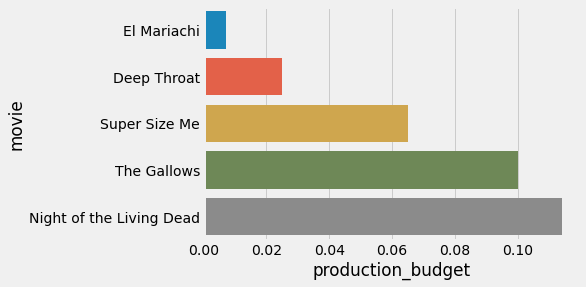

In [287]:
five = top_ten.sort_values(by='production_budget', ascending=True)[:5]
sns.barplot(y='movie', x='production_budget', data=five);

In [286]:
blue = sns.color_palette("RdPu_r", 25)
sns.barplot(y='movie', x='production_budget', data= top_ten, ax=ax[1], palette=blue);

# Biggest nominal loss movies, 3 of which are streamers, so no box office

## Going to drop data where domestic gross and worldwide gross = 0

In [243]:
no_streamers = tn_budgets_df.loc[(tn_budgets_df['domestic_gross'] != 0) & (tn_budgets_df['worldwide_gross'] != 0)]
ten_worst = no_streamers.sort_values(by='gross_profit', ascending=True)[:10]
ten_worst

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,roi
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-200.237650,-0.572108
193,94,"Mar 11, 2011",Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,-0.736335
341,42,"Jun 14, 2019",Men in Black: International,110.0,3.100000,3.100000,-106.900000,-0.971818
352,53,"Apr 27, 2001",Town & Country,105.0,6.712451,10.364769,-94.635231,-0.901288
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,-0.929050
477,78,"Apr 21, 2017",The Promise,90.0,8.224288,10.551417,-79.448583,-0.882762
607,8,"Sep 2, 2005",A Sound of Thunder,80.0,1.900451,6.300451,-73.699549,-0.921244
435,36,"Dec 22, 1995",Cutthroat Island,92.0,10.017322,18.517322,-73.482678,-0.798725
300,1,"Dec 17, 2010",How Do You Know?,120.0,30.212620,49.628177,-70.371823,-0.586432
669,70,"Feb 23, 2001",Monkeybone,75.0,5.409517,5.409517,-69.590483,-0.927873


"Blues_r"
"Reds_r"
"Purples_r"
"Oranges_r"
"Greys_r"
"YlOrBr_r"
"BuPu_r"
"YlGnBu_r"
"RdPu_r"
"PuBuGn_r"

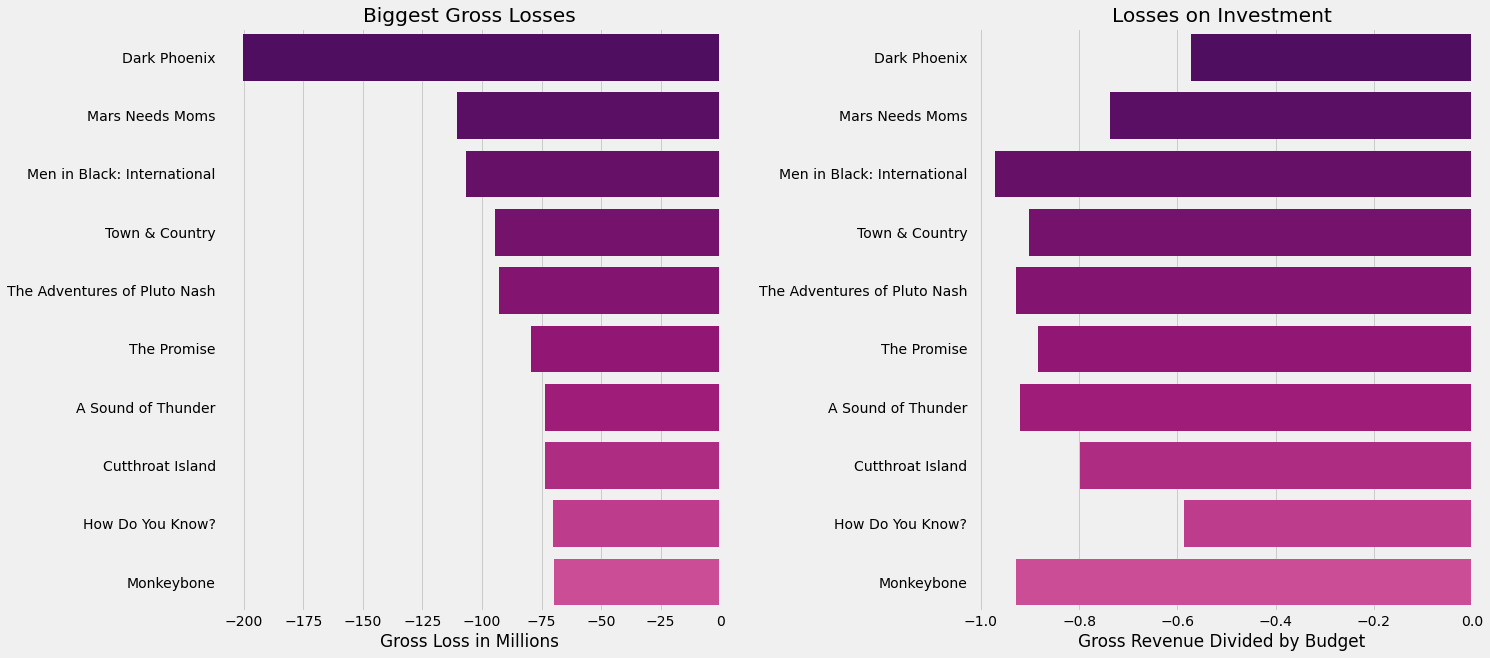

In [246]:
# plotting worst financial movies
# setting color, figsize
greens = sns.color_palette("RdPu_r", 25)
fig, ax = plt.subplots(ncols=2, figsize=(20,10), gridspec_kw={'wspace': .5})

# plot gross profit
sns.barplot(y='movie', x='gross_profit', data=ten_worst, ax=ax[0], palette=greens)
ax[0].set_xlabel("Gross Loss in Millions")
ax[0].set_ylabel("")
ax[0].set_title("Biggest Gross Losses")
ax[1].set_yticklabels("")

# plot loss on investment
sns.barplot(y='movie', x='roi', data=ten_worst.sort_values(by='gross_profit', ascending=True), ax=ax[1], palette=greens)
ax[1].set_ylabel("")
ax[1].set_xlabel("Gross Revenue Divided by Budget")
ax[1].set_title("Losses on Investment");

# 3rd CSV data exploration: rotten tomatoes

In [154]:
rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [155]:
rt_movie_df.shape

(1560, 12)

In [156]:
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### This df doesn't have movie titles at all, so needs to be joined with another table i think

In [72]:
rt_movie_df.duplicated().sum()

0

# 4th CSV Next Piece of Data: Rotten tomatoes reviews

In [73]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [74]:
rt_reviews_df['review'][0]

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

In [75]:
rt_reviews_df.shape

(54432, 8)

In [76]:
rt_reviews_df.top_critic.value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [77]:
rt_movie_df['id'][0]

1

In [78]:
rt_reviews_df['id'][0]

3

# Separate the reviews by top_critics

In [79]:
top_critics = rt_reviews_df.loc[rt_reviews_df['top_critic'] == 1].copy()

In [80]:
top_critics.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012"
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012"
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012"
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,"August 23, 2012"
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,"August 23, 2012"


In [81]:
top_critics.shape

(13096, 8)

# Top 48 critics all have more than 40 reviews logged

In [82]:
review_counts = top_critics.groupby('id').agg('sum')
review_counts.agg(['max', 'min', 'mean'])
review_counts.sort_values(by='top_critic', ascending=False)[40:49]

,top_critic
id,
1695,40
301,40
1525,40
1523,40
290,40
1496,40
1017,40
1009,40
65,39


In [83]:
review_counts.sort_values(by='top_critic', ascending=False)[:10]  # 54 is max value

,top_critic
id,
1777,54
1704,50
1646,49
1083,48
1071,47
1877,47
1545,47
251,47
1588,46


In [84]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [85]:
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# id column is unique identifyer for the rotten tomatoes dfs
# rt_movie_df has a genre feature, could be useful- 300 unique values

In [160]:
review = top_critics[top_critics['id'] == 3]
title = rt_movie_df[rt_movie_df['id'] == 3]
# review

In [161]:
# title  # from rt_movie_df

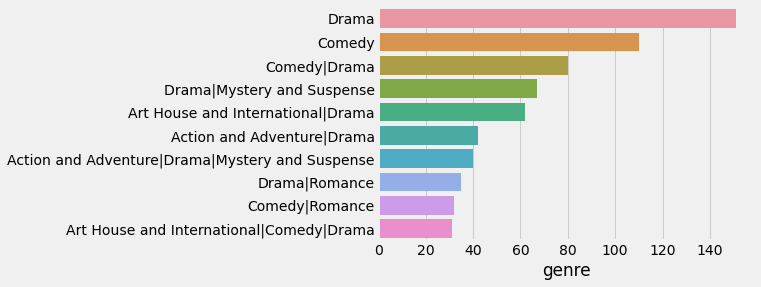

In [162]:
sns.barplot(y=rt_movie_df['genre'].value_counts()[:10].index, x=rt_movie_df['genre'].value_counts()[:10]);

# 5th CSV: the movie db ('tmdb')

In [163]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [164]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [165]:
tmdb_df['popularity'].agg(['max', 'min', 'mean'])

max     80.773000
min      0.600000
mean     3.130912
Name: popularity, dtype: float64

In [166]:
tmdb_df['vote_average'].agg(['max', 'min', 'mean'])

max     10.000000
min      0.000000
mean     5.991281
Name: vote_average, dtype: float64

# Possibly Drop These

In [167]:
tmdb_df[tmdb_df['vote_average'] == 0]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2467,2467,[],331998,en,Edie: Girl on Fire,0.600,2010-01-01,Edie: Girl on Fire,0.0,1
4078,4078,"[28, 27, 878, 37]",57817,en,Red River,0.875,2011-05-05,Red River,0.0,1
4282,4282,[35],41840,en,Tom Wilson: Bigger Than You,0.666,2011-12-09,Tom Wilson: Bigger Than You,0.0,1
5176,5176,"[18, 9648, 53]",102678,en,Dead Write,0.600,2011-01-01,Dead Write,0.0,1
5177,5177,[18],81267,hi,क्षय,0.600,2011-10-08,Corrode,0.0,1
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [168]:
tmdb_df[tmdb_df['vote_average'] == 0]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2467,2467,[],331998,en,Edie: Girl on Fire,0.600,2010-01-01,Edie: Girl on Fire,0.0,1
4078,4078,"[28, 27, 878, 37]",57817,en,Red River,0.875,2011-05-05,Red River,0.0,1
4282,4282,[35],41840,en,Tom Wilson: Bigger Than You,0.666,2011-12-09,Tom Wilson: Bigger Than You,0.0,1
5176,5176,"[18, 9648, 53]",102678,en,Dead Write,0.600,2011-01-01,Dead Write,0.0,1
5177,5177,[18],81267,hi,क्षय,0.600,2011-10-08,Corrode,0.0,1
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
